### 5.	Collecting new data only for selected features
After selecting the important features, a new data of natural flow/gas lift wells is collected for all fields.

In [1]:
#Importing the related libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set()
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, KBinsDiscretizer

In [2]:
#Importing the data sample

data_EDA = pd.read_csv('All wells-final.csv')
data_EDA.head(3)

,FIELD,P/F,WELL,DATE,WHP,WHT,Tr,Ɣw,Pr,Pr-Pb,Reservoir,Tubing_type,WC,I.GAS,D/S,BFPD,BOPD
0,GS324,324,EDFU-A2,8-May-18,145,137,288,1.186,2585,265,Nezzazat Edfu,Normal 4.5 short*3.5,18.0,1.6,835,1521,1247
1,GS324,324,EDFU-A2,9-May-18,175,135,288,1.186,2561,241,Nezzazat Edfu,Normal 4.5 short*3.5,18.0,1.7,765,1300,1066
2,GS324,324,EDFU-A3,14-Sep-16,185,113,252,1.102,1748,98,Lower Rudies Edfu,Normal 4.5 short*3.5,1.0,1.3,775,750,743


In [3]:
data_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260 entries, 0 to 4259
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FIELD        4260 non-null   object 
 1   P/F          4260 non-null   object 
 2   WELL         4260 non-null   object 
 3   DATE         4260 non-null   object 
 4   WHP          4260 non-null   int64  
 5   WHT          4260 non-null   int64  
 6   Tr           4260 non-null   int64  
 7   Ɣw           4260 non-null   float64
 8   Pr           4260 non-null   int64  
 9   Pr-Pb        4260 non-null   int64  
 10  Reservoir    4260 non-null   object 
 11  Tubing_type  4260 non-null   object 
 12  WC           4260 non-null   float64
 13  I.GAS        4260 non-null   float64
 14  D/S          4260 non-null   int64  
 15  BFPD         4260 non-null   int64  
 16  BOPD         4260 non-null   int64  
dtypes: float64(3), int64(8), object(6)
memory usage: 565.9+ KB


In [4]:
Wells_no = len(data_EDA['WELL'].unique())
Reservoirs = len(data_EDA['Reservoir'].unique())
Tubing_types = len(data_EDA['Tubing_type'].unique())
Wells_no, Reservoirs, Tubing_types

(150, 31, 8)

As shown, the data consists of 4260 well tests collected from 150 natural flow and gas lift wells representing 31 different reservoirs.

### 6.	Exploring the data variables using Exploratory Data Analysis (EDA)

In [5]:
round(data_EDA.describe(include='all'))

,FIELD,P/F,WELL,DATE,WHP,WHT,Tr,Ɣw,Pr,Pr-Pb,Reservoir,Tubing_type,WC,I.GAS,D/S,BFPD,BOPD
count,4260,4260,4260,4260,4260.0,4260.0,4260.0,4260.0,4260.0,4260.0,4260,4260,4260.0,4260.0,4260.0,4260.0,4260.0
unique,8,28,150,2989,NaN,NaN,NaN,NaN,NaN,NaN,31,8,NaN,NaN,NaN,NaN,NaN
top,October,R-6,B-6,21-Jun-03,NaN,NaN,NaN,NaN,NaN,NaN,Nubia October,Normal 4.5 long*3.5,NaN,NaN,NaN,NaN,NaN
freq,2671,941,135,6,NaN,NaN,NaN,NaN,NaN,NaN,1740,1392,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,131.0,146.0,262.0,1.0,3027.0,1109.0,NaN,NaN,62.0,3.0,1003.0,2504.0,722.0
std,NaN,NaN,NaN,NaN,80.0,35.0,22.0,0.0,906.0,897.0,NaN,NaN,29.0,1.0,291.0,1687.0,682.0
min,NaN,NaN,NaN,NaN,63.0,58.0,165.0,1.0,1090.0,-1990.0,NaN,NaN,0.0,0.0,1.0,110.0,0.0
25%,NaN,NaN,NaN,NaN,103.0,118.0,250.0,1.0,2600.0,756.0,NaN,NaN,46.0,2.0,850.0,1110.0,344.0
50%,NaN,NaN,NaN,NaN,115.0,145.0,260.0,1.0,2710.0,1018.0,NaN,NaN,72.0,3.0,1060.0,2101.0,549.0
75%,NaN,NaN,NaN,NaN,137.0,172.0,282.0,1.0,3604.0,1526.0,NaN,NaN,84.0,4.0,1220.0,3572.0,871.0


In [6]:
#Creating new column to determine the well type
data_EDA['Well_type'] = data_EDA['I.GAS'].apply(lambda x:"NF" if x == 0 else "GL")

In [7]:
#Calculating number of NF wells
data_EDA[data_EDA.Well_type=="NF"].shape[0]

134

In [8]:
data_EDA.head(3)

,FIELD,P/F,WELL,DATE,WHP,WHT,Tr,Ɣw,Pr,Pr-Pb,Reservoir,Tubing_type,WC,I.GAS,D/S,BFPD,BOPD,Well_type
0,GS324,324,EDFU-A2,8-May-18,145,137,288,1.186,2585,265,Nezzazat Edfu,Normal 4.5 short*3.5,18.0,1.6,835,1521,1247,GL
1,GS324,324,EDFU-A2,9-May-18,175,135,288,1.186,2561,241,Nezzazat Edfu,Normal 4.5 short*3.5,18.0,1.7,765,1300,1066,GL
2,GS324,324,EDFU-A3,14-Sep-16,185,113,252,1.102,1748,98,Lower Rudies Edfu,Normal 4.5 short*3.5,1.0,1.3,775,750,743,GL


In [9]:
numeric_vars = ['WHP', 'WHT', 'Tr', 'Ɣw', 'Pr', 'Pr-Pb', 'WC', 'I.GAS', 'D/S', 'BFPD']

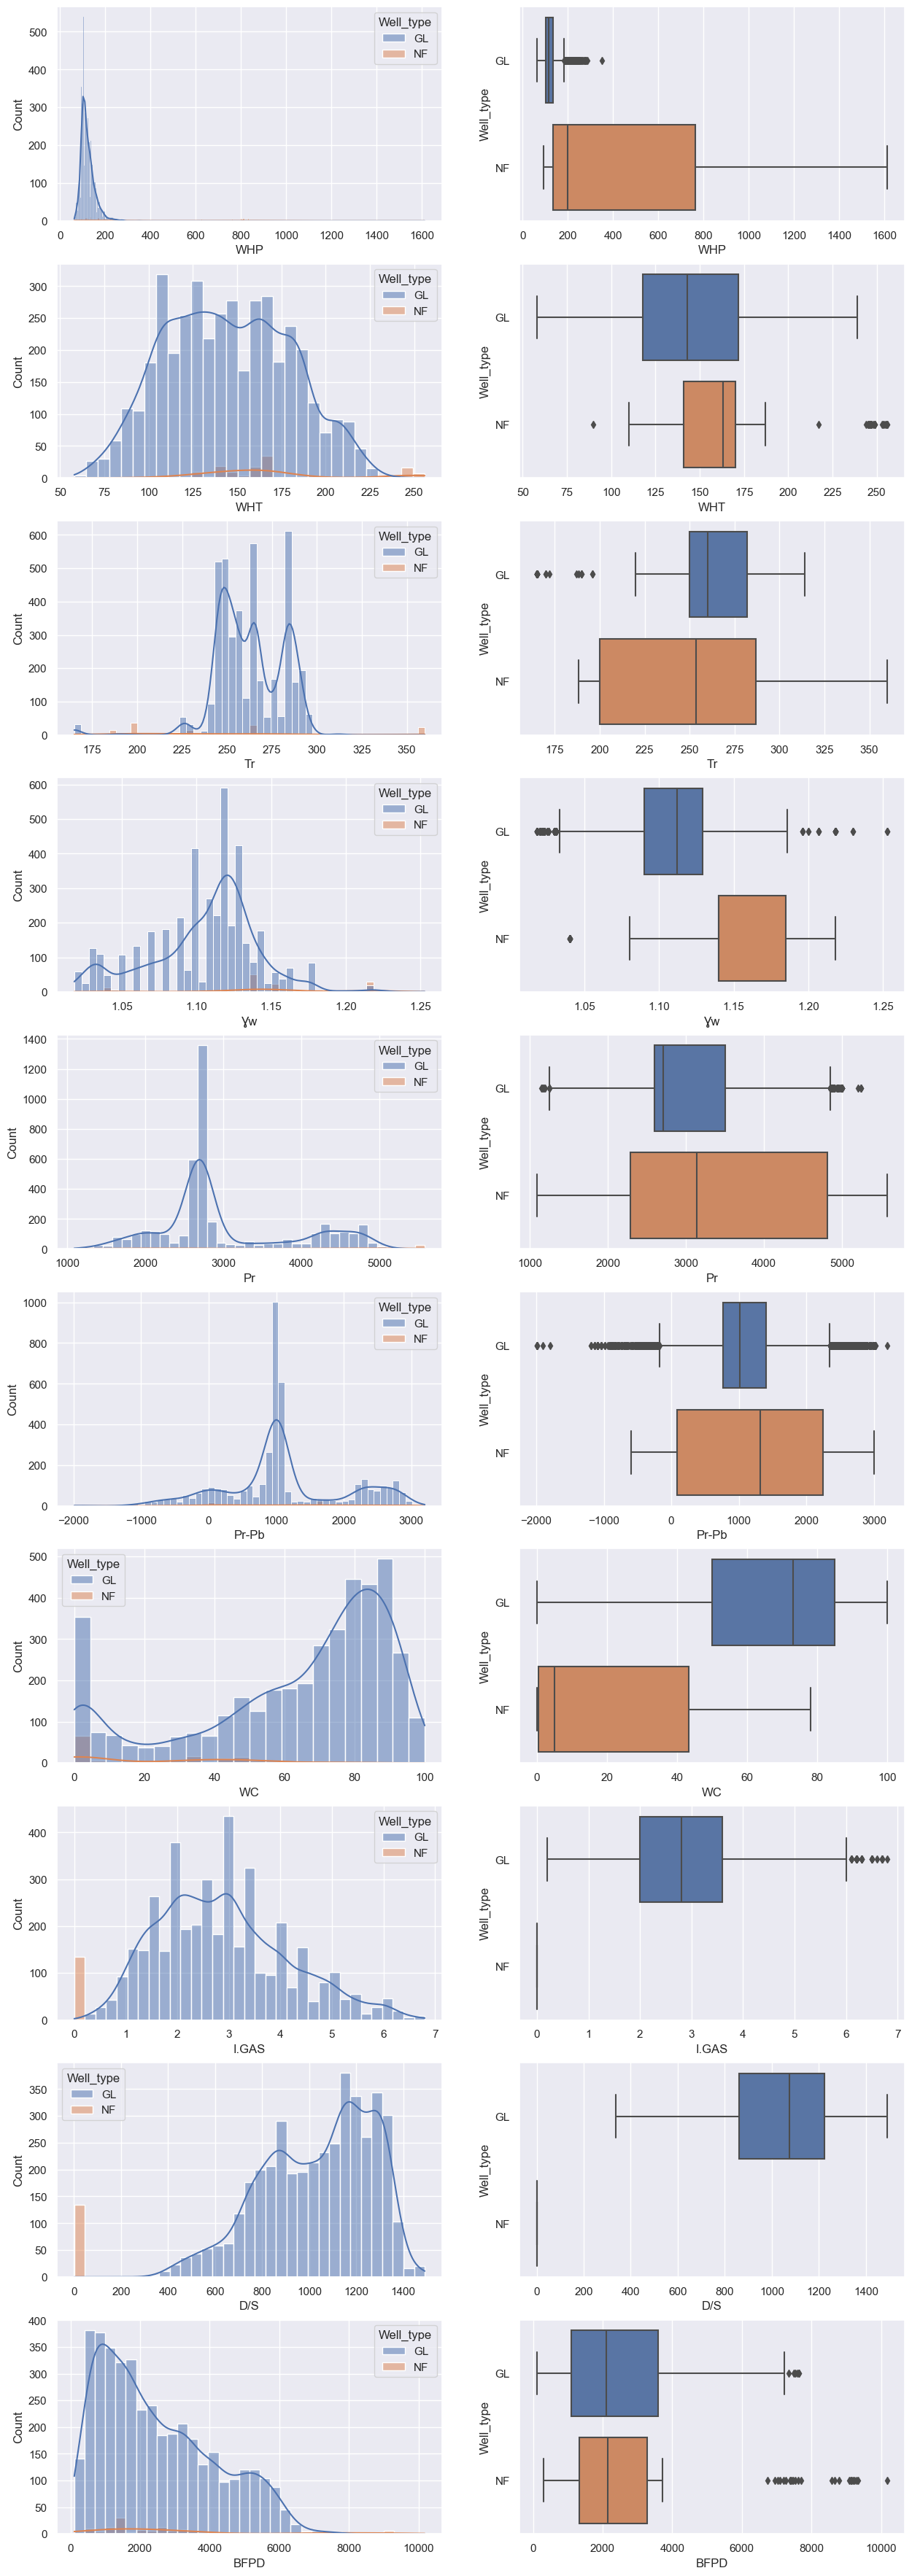

In [10]:
#Exploring numerical variables
fig, axes = plt.subplots(len(numeric_vars), 2, figsize=(15, 45))

for i in range(len(numeric_vars)):
    sb.histplot(data=data_EDA, x=numeric_vars[i], hue='Well_type', kde=True, ax=axes[i,0])
    sb.boxplot(data=data_EDA, x=numeric_vars[i], y='Well_type', ax=axes[i,1])

As shown from the above table and figures:
- All numerical variables are not normally distributed and need feature engineering.
- The output variable BFPD is heavily skewed to the right due to some slightly high production rates corresponding to NF wells and some high production GL wells.
- WHP values are heavily right skewed due to high pressure values for some NF wells which should be considered when building the model.
- WHT temperature values are normally distributed for GL wells with some outliers in NF wells which should be considered when building the model.
- Tr and Ɣw	distribution are not normally distributed and have some left and right outliers.
- Pr and Pr-Pb have similar distribution with most values of Pr between 2600-3000 psi with left and right outliers.
- WC distribution is bi-modal due to the existence of a lot of WC values below 5% and above 70%.
- I/G distribution is slightly skewed to the right with some values at zero corresponding to NF wells.
- D/S distribution is skewed to the left with some values at one corresponding to NF wells.

Note: NF wells has 0 injection gas and 1 psi downstream values.

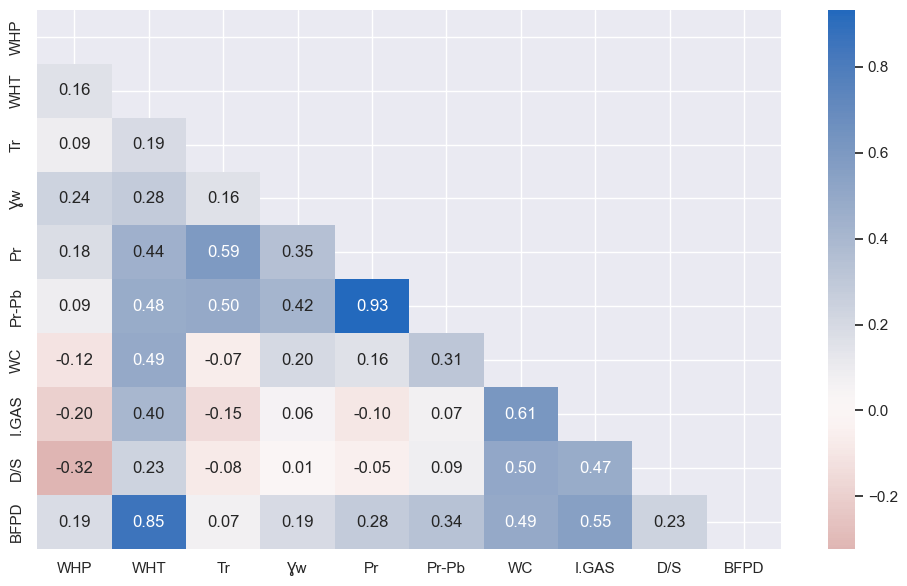

In [11]:
#Plotting correlation matrix between variables

plt.figure(figsize = [12, 7])
corr_matrix = data_EDA[numeric_vars].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr_matrix, mask=mask, annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

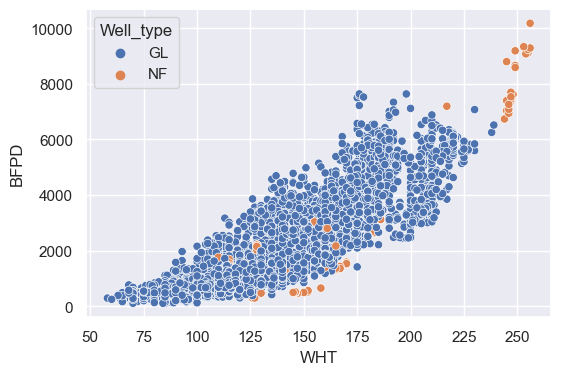

In [12]:
#Plotting relationship between BFPD and WHT

plt.figure(figsize = [6, 4])
sb.scatterplot(data=data_EDA, x='WHT', y='BFPD', hue='Well_type');

The above figures showed strong correlation between BFPD and WHT, and also BFPD is correlated with I/G and WC. It is expected that these variables will have the significant impact on the output variable. There is strong correlation between Pr and Pr-Pb, so one of the two variables will be dropped to mitigate collinearity. 

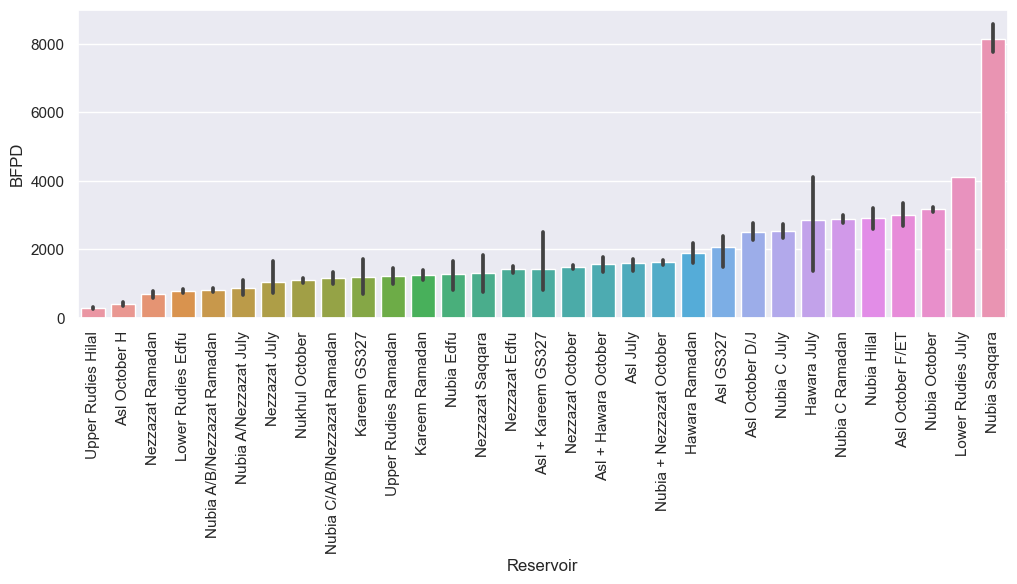

In [13]:
#Exploring categorical variables
plt.figure(figsize = [12, 4])
sb.barplot(data=data_EDA, x="Reservoir", y="BFPD", order=data_EDA.groupby(["Reservoir"])["BFPD"].mean().sort_values().index)
plt.xticks(rotation=90);

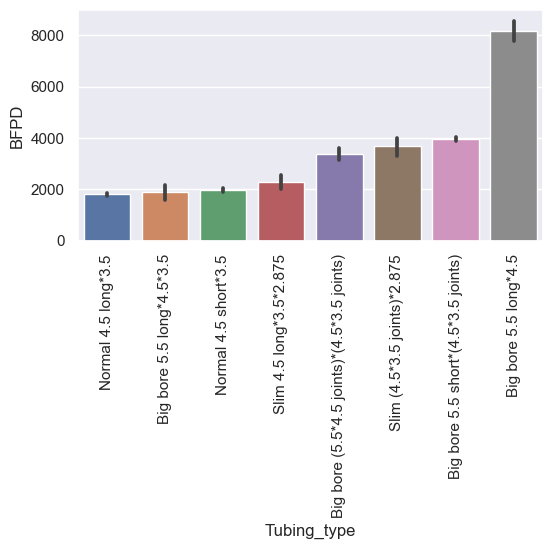

In [14]:
plt.figure(figsize = [6,3])
sb.barplot(data=data_EDA, x="Tubing_type", y="BFPD", order=data_EDA.groupby(["Tubing_type"])["BFPD"].mean().sort_values().index)
plt.xticks(rotation=90);

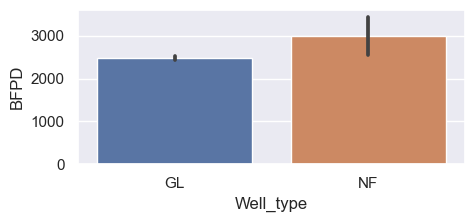

In [15]:
plt.figure(figsize = [5,2])
sb.barplot(data=data_EDA, x="Well_type", y="BFPD");

As shown from the above figures, Reservoir, tubing and well type categories have significant effect on fluid rate.

### 7.	Feature Engineering

In [16]:
#Creating box-cox, yeo-johnson, quantile and k-bins tranformers
bc=PowerTransformer(method='box-cox')
yj=PowerTransformer(method='yeo-johnson')
qt=QuantileTransformer(n_quantiles=500,output_distribution='normal')
kbins = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile')

In [17]:
plt.rcParams["figure.figsize"]=6,3

### WHP

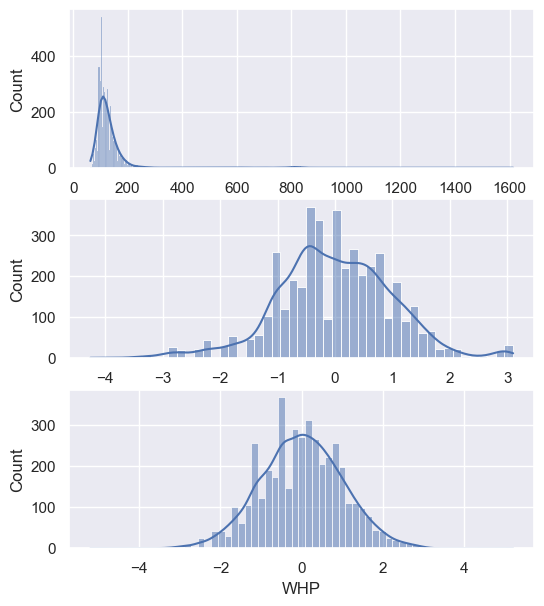

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(6, 7))
sb.histplot(x=data_EDA['WHP'],kde=True, ax=axes[0])
sb.histplot(x=bc.fit_transform(data_EDA['WHP'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[1])
sb.histplot(x=qt.fit_transform(data_EDA['WHP'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[2])
plt.xlabel("WHP");

In [19]:
#Box-Cox transformer will be used for wellhead pressure variable
data_EDA['WHP'] = bc.fit_transform(data_EDA['WHP'].values.reshape(-1,1)).reshape(data_EDA.shape[0])

### WHT

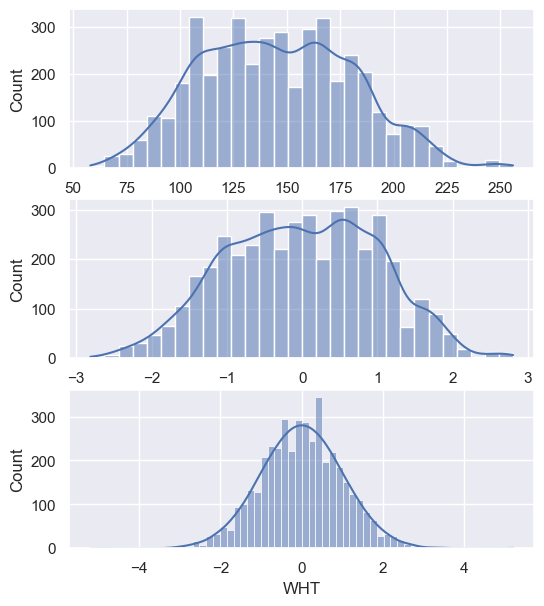

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(6, 7))
sb.histplot(x=data_EDA['WHT'],kde=True, ax=axes[0])
sb.histplot(x=bc.fit_transform(data_EDA['WHT'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[1])
sb.histplot(x=qt.fit_transform(data_EDA['WHT'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[2])
plt.xlabel("WHT");

In [21]:
#Box-Cox transformer will be used for wellhead temperature variable
data_EDA['WHT'] = bc.fit_transform(data_EDA['WHT'].values.reshape(-1,1)).reshape(data_EDA.shape[0],)

### Tr

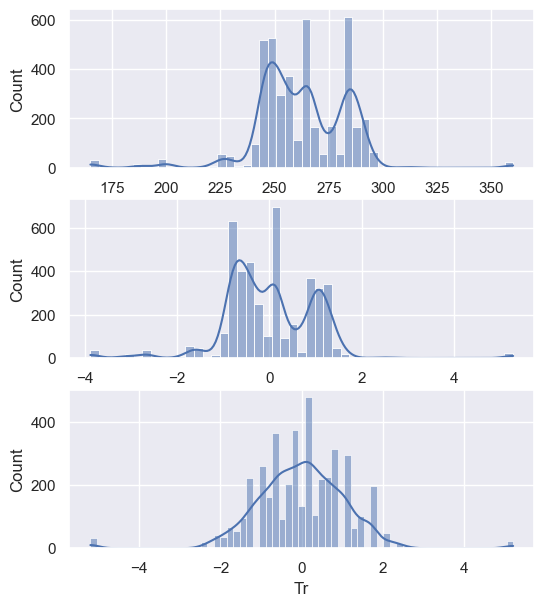

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(6, 7))
sb.histplot(x=data_EDA['Tr'],kde=True, ax=axes[0])
sb.histplot(x=bc.fit_transform(data_EDA['Tr'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[1])
sb.histplot(x=qt.fit_transform(data_EDA['Tr'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[2])
plt.xlabel("Tr");

In [23]:
#quantile transformer will be used for reservoir temperature variable
data_EDA['Tr'] = qt.fit_transform(data_EDA['Tr'].values.reshape(-1,1)).reshape(data_EDA.shape[0],)

### Ɣw

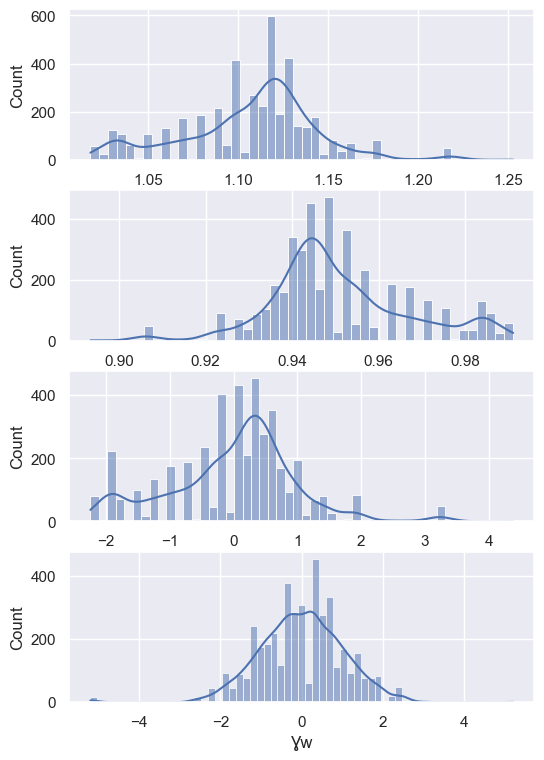

In [24]:
fig, axes = plt.subplots(4, 1, figsize=(6, 9))
sb.histplot(x=data_EDA['Ɣw'],kde=True, ax=axes[0])
sb.histplot(x=(1/data_EDA['Ɣw'])**0.5,kde=True, ax=axes[1])
sb.histplot(x=bc.fit_transform(data_EDA['Ɣw'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[2])
sb.histplot(x=qt.fit_transform(data_EDA['Ɣw'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[3])
plt.xlabel("Ɣw");

In [25]:
#quantile transformer will be used for water gravity variable
data_EDA['Ɣw'] = qt.fit_transform(data_EDA['Ɣw'].values.reshape(-1,1)).reshape(data_EDA.shape[0],)

### Pr

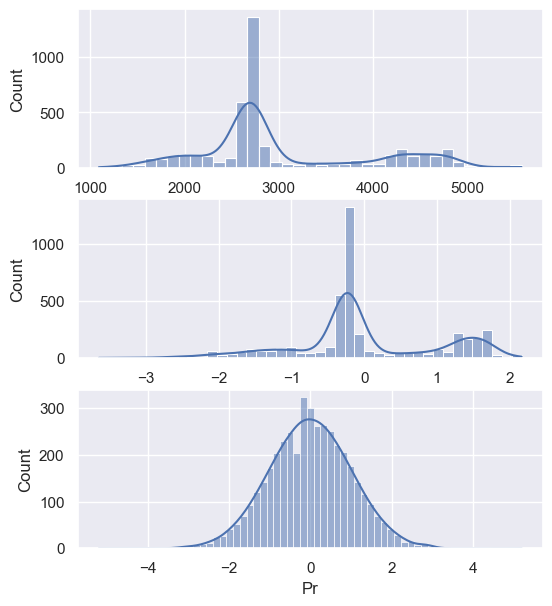

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(6, 7))
sb.histplot(x=data_EDA['Pr'],kde=True, ax=axes[0])
sb.histplot(x=bc.fit_transform(data_EDA['Pr'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[1])
sb.histplot(x=qt.fit_transform(data_EDA['Pr'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[2])
plt.xlabel("Pr");

In [27]:
#quantile transformer will be used for reservoir pressure variable
data_EDA['Pr'] = qt.fit_transform(data_EDA['Pr'].values.reshape(-1,1)).reshape(data_EDA.shape[0],)

### Pr - Pb

In [28]:
#The same transformer as Pr will be used 
data_EDA['Pr-Pb'] = qt.fit_transform(data_EDA['Pr-Pb'].values.reshape(-1,1)).reshape(data_EDA.shape[0],)

### WC

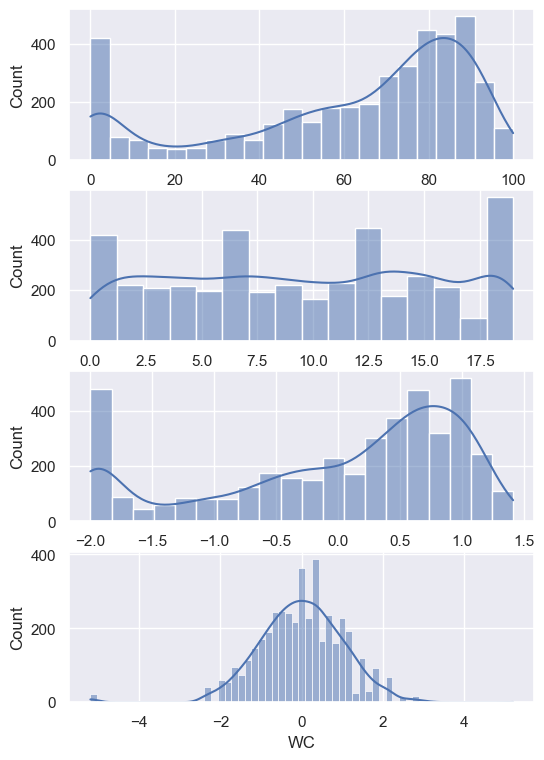

In [29]:
fig, axes = plt.subplots(4, 1, figsize=(6, 9))
sb.histplot(x=data_EDA['WC'],kde=True, ax=axes[0])
sb.histplot(x=kbins.fit_transform(data_EDA['WC'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[1])
sb.histplot(x=yj.fit_transform(data_EDA['WC'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[2])
sb.histplot(x=qt.fit_transform(data_EDA['WC'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[3])
plt.xlabel("WC");

In [30]:
#quantile transformer will be used for watercut variable
data_EDA['WC'] = qt.fit_transform(data_EDA['WC'].values.reshape(-1,1)).reshape(data_EDA.shape[0],)

### IG

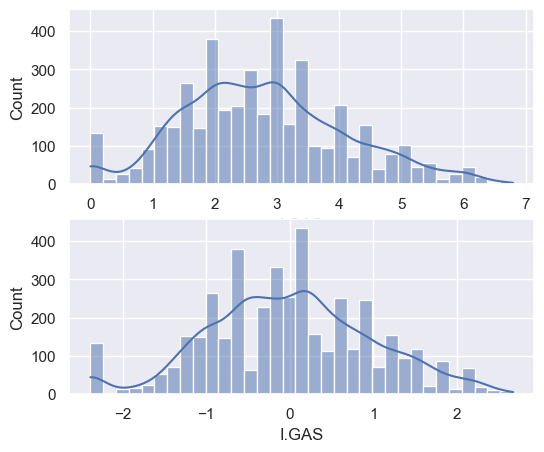

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(6, 5))
sb.histplot(x=data_EDA['I.GAS'],kde=True, ax=axes[0])
sb.histplot(x=yj.fit_transform(data_EDA['I.GAS'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[1])
plt.xlabel("I.GAS");

In [32]:
#yeo-johnson will be used for injection gas variable
data_EDA['I.GAS'] = yj.fit_transform(data_EDA['I.GAS'].values.reshape(-1,1)).reshape(data_EDA.shape[0],)

# D/S

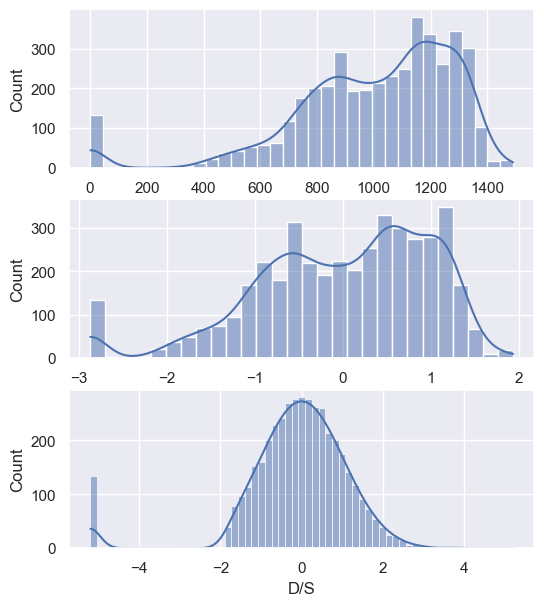

In [33]:
fig, axes = plt.subplots(3, 1, figsize=(6, 7))
sb.histplot(x=data_EDA['D/S'],kde=True, ax=axes[0])
sb.histplot(x=yj.fit_transform(data_EDA['D/S'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[1])
sb.histplot(x=qt.fit_transform(data_EDA['D/S'].values.reshape(-1,1)).reshape(data_EDA.shape[0],),kde=True, ax=axes[2])
plt.xlabel("D/S");

In [34]:
#yeo-johnson will be used for casing pressure variable
data_EDA['D/S'] = yj.fit_transform(data_EDA['D/S'].values.reshape(-1,1)).reshape(data_EDA.shape[0],)

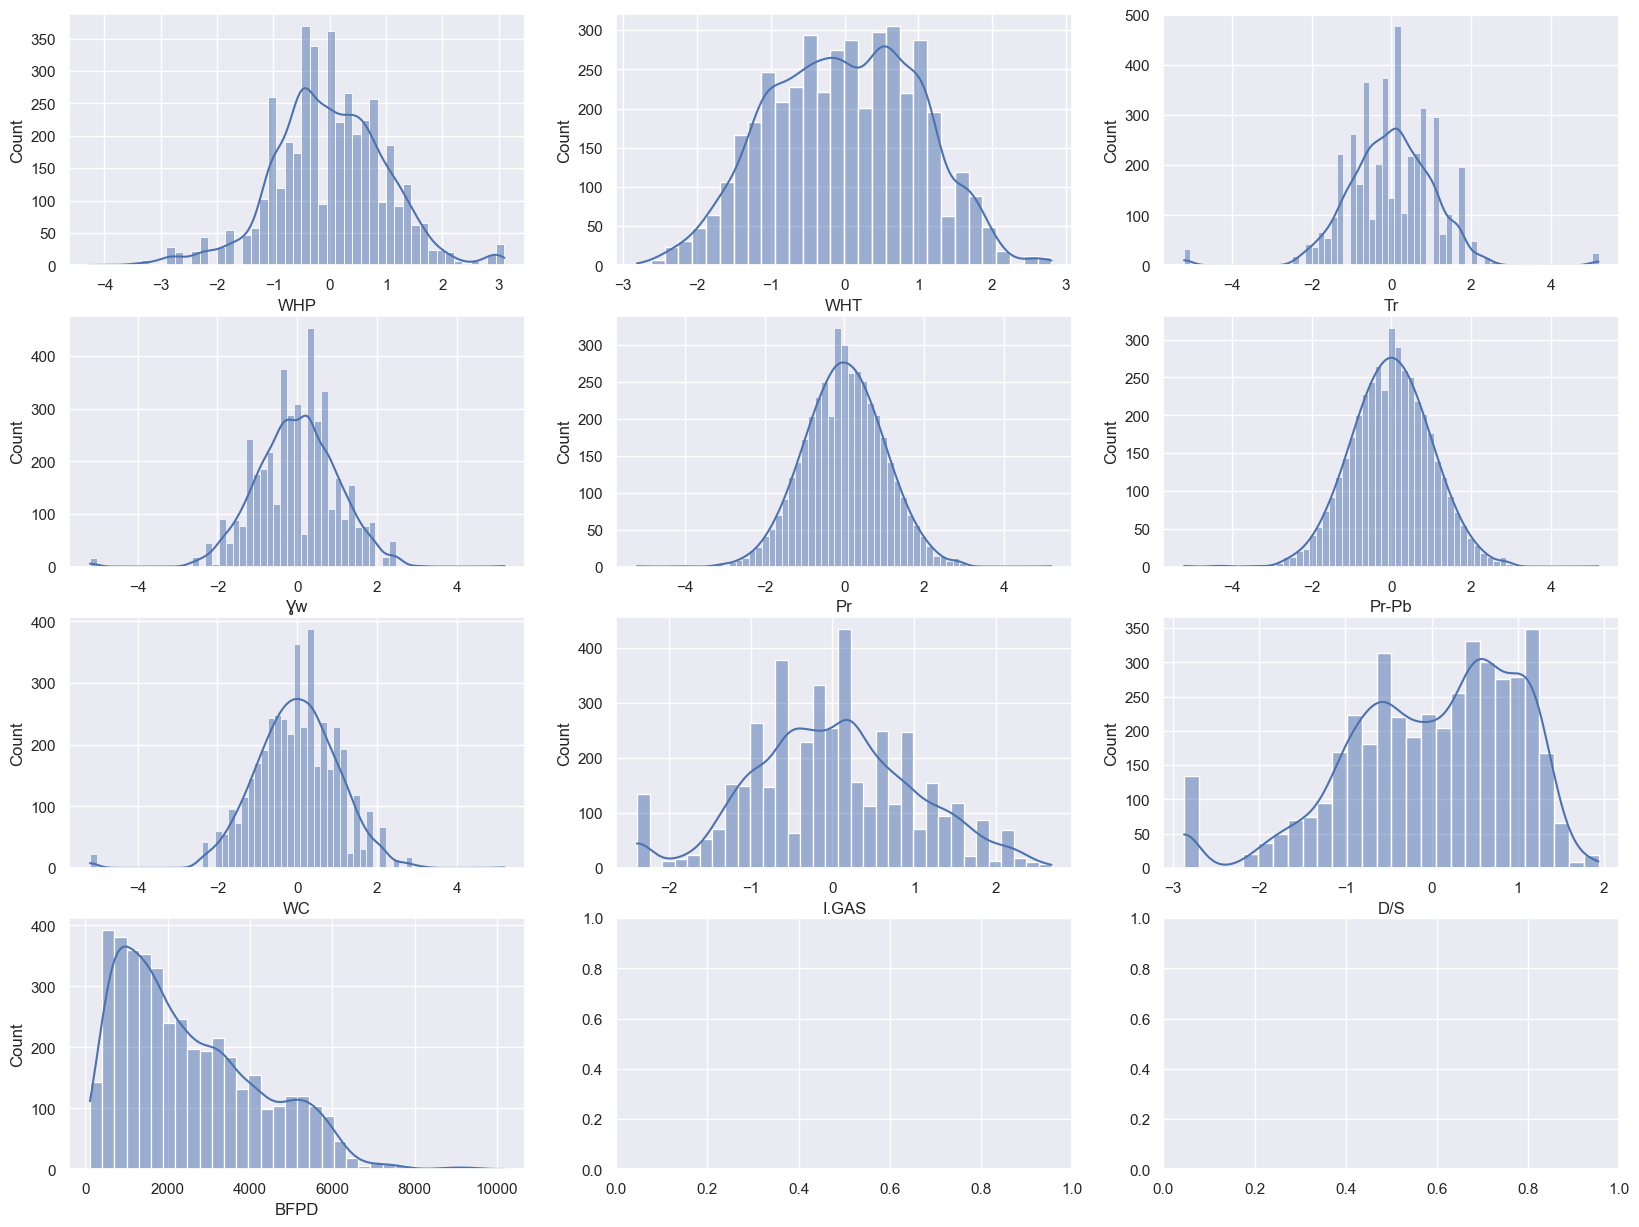

In [35]:
#exploring numerical variables after transformation
p=0
fig, axes = plt.subplots(4, 3, figsize=(20, 15))

for i in range(4):
    for j in range(3):
        sb.histplot(data=data_EDA, x=numeric_vars[p], kde=True, ax=axes[i,j])
        p+=1
        if p ==len(numeric_vars): break

In [36]:
data_EDA.head()

,FIELD,P/F,WELL,DATE,WHP,WHT,Tr,Ɣw,Pr,Pr-Pb,Reservoir,Tubing_type,WC,I.GAS,D/S,BFPD,BOPD,Well_type
0,GS324,324,EDFU-A2,8-May-18,0.837790,-0.197975,1.397296,2.147788,-0.763962,-0.947109,Nezzazat Edfu,Normal 4.5 short*3.5,-1.074575,-0.872934,-0.689752,1521,1247,GL
1,GS324,324,EDFU-A2,9-May-18,1.375311,-0.255465,1.397296,2.147788,-0.840190,-0.968263,Nezzazat Edfu,Normal 4.5 short*3.5,-1.074575,-0.790182,-0.935168,1300,1066,GL
2,GS324,324,EDFU-A3,14-Sep-16,1.509146,-0.910784,-0.438088,-0.264776,-1.773619,-1.107020,Lower Rudies Edfu,Normal 4.5 short*3.5,-1.597203,-1.127419,-0.900590,750,743,GL
3,GS324,324,EDFU-A3,15-Sep-16,1.221910,-0.697423,-0.438088,-0.264776,-1.774095,-1.107705,Lower Rudies Edfu,Normal 4.5 short*3.5,-1.597203,-1.576224,-1.205758,825,817,GL
4,GS324,324,EDFU-A3,18-Mar-18,-0.049646,-1.385636,-0.438088,-0.264776,-2.331984,-1.482620,Lower Rudies Edfu,Normal 4.5 short*3.5,-0.737330,-1.302864,-1.385296,730,409,GL


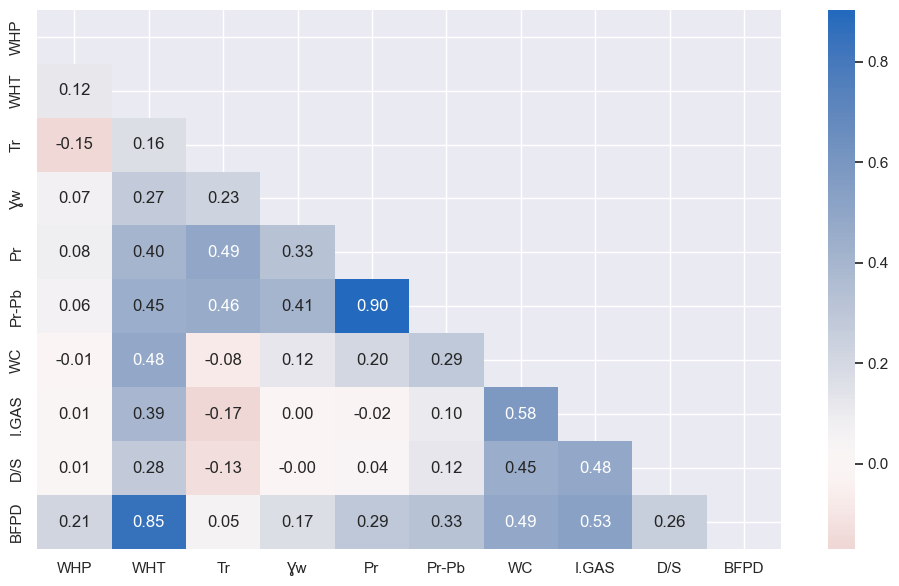

In [37]:
#Plotting correlation matrix between variables after transformation

plt.figure(figsize = [12, 7])
corr_matrix = data_EDA[numeric_vars].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr_matrix, mask=mask, annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

As shown, there is again strong correlation between BFPD and WHT. Also the correlation between BFPD with WC, I/G and D/S was enhanced after transformation.